# AAE625 HW3 
Zhijie Zhang

### 0.1 Imports

In [25]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
sns.set()
%matplotlib inline

### 0.2 Loading Data

In [26]:
demand_data = pd.read_csv("/Users/jesmyn/Desktop/AAE625/demand_data_204_records.csv")
demand_data_sorted = demand_data.sort_values(by='Price', ascending=True)
cs_df = pd.read_csv("/Users/jesmyn/Desktop/AAE625/consumer_data_tshirts_106_records.csv")               

## Part1 Demand and Consumer Behavior for strategic pricing

### 1.0 Data Description 

A personal survey from June 2020 reveals that a store's weekly T-shirt sales average at 50.5 units at a mean price of $19.90, with prices ranging from $10 to $29.80 and sales quantities spanning 1 to 100 T-shirts. The data indicates consistent sales with moderate price variability, reflecting a balanced market demand.

In [27]:
demand_data.shape
demand_data.head()
demand_data.columns.to_list()
demand_data.info()
demand_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     204 non-null    float64
 1   Quantity  204 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,Price,Quantity
count,204.000000,204.000000
mean,19.900000,50.500000
std,5.757985,28.789926
min,10.000000,1.000000
25%,14.950000,25.750000
50%,19.900000,50.500000
75%,24.850000,75.250000
max,29.800000,100.000000


The data from a June 2020 survey on T-shirt purchase intent at a store shows 106 customers with an average age of 41 and an average income of $66,212. Customers bought T-shirts roughly 4 times during the survey week, spending an average of $234.95. The data also reveals distinct customer segments, suggesting varied purchase patterns among the store's clientele.

In [28]:
cs_df.shape
cs_df.head()
cs_df.columns.to_list()
cs_df.info()
cs_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Consumer_ID         106 non-null    int64 
 1   Age                 106 non-null    int64 
 2   Income              106 non-null    int64 
 3   Education_Level     106 non-null    object
 4   Gender              106 non-null    object
 5   Product_Category    106 non-null    object
 6   Price_Sensitivity   106 non-null    object
 7   Purchase_Frequency  106 non-null    int64 
 8   Average_Spending    106 non-null    int64 
 9   Preferred_Brand     106 non-null    object
dtypes: int64(5), object(5)
memory usage: 8.4+ KB


,Consumer_ID,Age,Income,Purchase_Frequency,Average_Spending
count,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,40.500000,66212.235849,4.367925,234.952830
std,30.743563,13.871691,21120.144900,2.572105,144.627033
min,1.000000,18.000000,30206.000000,1.000000,20.000000
25%,27.250000,28.250000,49064.250000,2.000000,99.000000
50%,53.500000,40.500000,67330.500000,5.000000,234.000000
75%,79.750000,53.000000,83949.000000,6.000000,362.750000
max,106.000000,64.000000,99163.000000,9.000000,493.000000


### 1.1 Demand Curve

The Y-axis is labeled in a descending order from top to bottom, starting from a higher price down to a lower price as it moves downwards, which is the opposite of how axes are typically displayed. Given this arrangement, the graph does indeed represent a traditional demand curve, where higher prices are associated with lower quantities demanded. As the price decreases from $30 down to $10, the quantity demanded increases from 0 to 100 units.

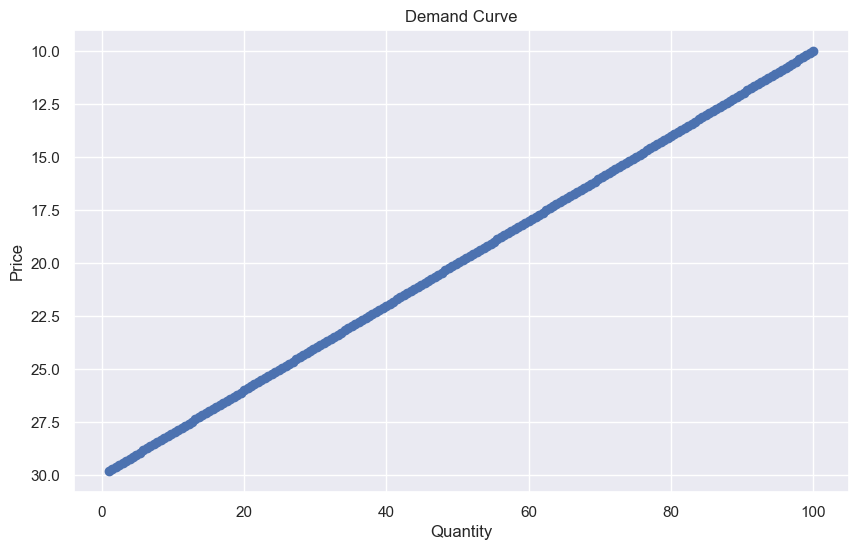

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(demand_data_sorted['Quantity'], demand_data_sorted['Price'], marker='o')
plt.title('Demand Curve')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.gca().invert_yaxis()  # Inverting the y-axis to show the downward-sloping demand curve
plt.grid(True)
plt.show()

### 1.2 Price Elasticity of Demand and Price Elasticity of Revenue 

In [30]:
# Calculate the midpoint elasticity for each interval
def calculate_midpoint_elasticity(demand_data):
    mid_elasticities = []
    for i in range(len(demand_data)-1):
        Q1, Q2 = demand_data['Quantity'].iloc[i], demand_data['Quantity'].iloc[i+1]
        P1, P2 = demand_data['Price'].iloc[i], demand_data['Price'].iloc[i+1]
        midpoint_Q = (Q2 - Q1) / ((Q2 + Q1) / 2)
        midpoint_P = (P2 - P1) / ((P2 + P1) / 2)
        elasticity = midpoint_Q / midpoint_P
        mid_elasticities.append(elasticity)
    return mid_elasticities

# Calculate elasticity of demand
demand_data['Elasticity'] = calculate_midpoint_elasticity(demand_data) + [np.nan]  # Adding NaN for the last point

# Calculate revenue and its elasticity
demand_data['Pct_change_Price'] = demand_data['Price'].pct_change()
demand_data['Pct_change_Quantity'] = demand_data['Quantity'].pct_change()
demand_data['Total_Revenue'] = demand_data['Price'] * demand_data['Quantity']
demand_data['Pct_change_Revenue'] = demand_data['Total_Revenue'].pct_change()
demand_data['Revenue_Elasticity'] = demand_data['Pct_change_Revenue'] / demand_data['Pct_change_Price']
demand_data = demand_data.dropna()  # or data.fillna(0)

# Output the calculated elasticities to the console
print("Elasticity of Demand:", demand_data['Elasticity'])
print("Elasticity of Revenue:", demand_data['Revenue_Elasticity'])

Elasticity of Demand: 1       -0.511054
2       -0.518514
3       -0.526048
4       -0.533657
5       -0.541343
          ...    
198    -45.954510
199    -54.414013
200    -66.591565
201    -85.628734
202   -119.594059
Name: Elasticity, Length: 202, dtype: float64
Elasticity of Revenue: 1       0.495123
2       0.487748
3       0.480300
4       0.472779
5       0.465183
         ...    
198   -36.329987
199   -41.766476
200   -49.000000
201   -59.098000
202   -74.182045
Name: Revenue_Elasticity, Length: 202, dtype: float64


At the start of the data, the elasticity values are relatively small in magnitude (closer to 0), such as -0.511054, which indicates inelastic demand; prices changes are not causing significant changes in quantity demanded. As the numbers decrease further from zero, reaching values like -54.414013, demand becomes more elastic, meaning that consumers are becoming more sensitive to price changes. Extremely high magnitudes, like -119.594059, suggest highly elastic demand, where small price changes result in very large changes in quantity demanded.

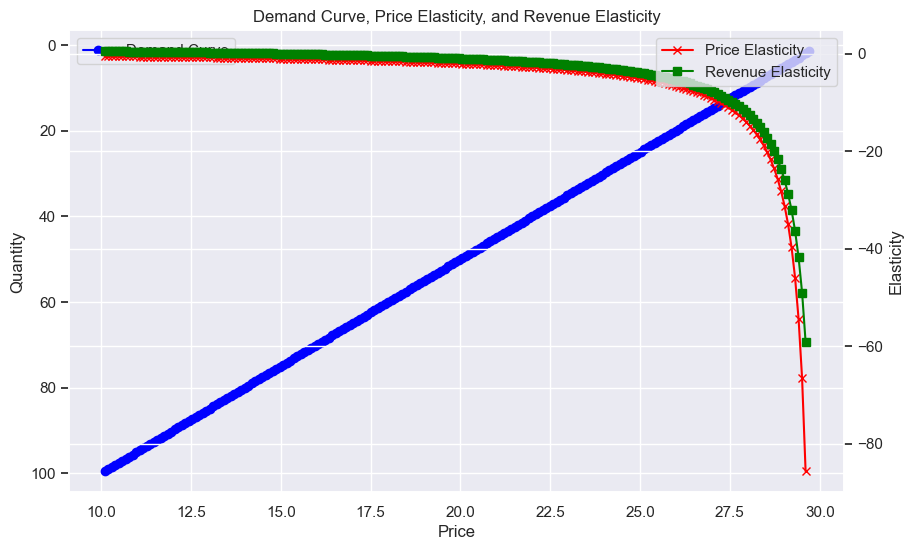

In [31]:
# Create the figure and the axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Demand Curve on the primary y-axis
ax1.plot(demand_data['Price'], demand_data['Quantity'], label='Demand Curve', color='blue', marker='o')
ax1.set_xlabel('Price')
ax1.set_ylabel('Quantity')
ax1.invert_yaxis()  # Invert y-axis because demand curves slope downward
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis to plot elasticity and revenue elasticity
ax2 = ax1.twinx()
ax2.plot(demand_data['Price'][:-1], demand_data['Elasticity'][:-1], label='Price Elasticity', color='red', marker='x')
ax2.plot(demand_data['Price'][:-1], demand_data['Revenue_Elasticity'][:-1], label='Revenue Elasticity', color='green', marker='s')
ax2.set_ylabel('Elasticity')
ax2.legend(loc='upper right')

# Set the title
plt.title('Demand Curve, Price Elasticity, and Revenue Elasticity')

# Show the plot
plt.show()

The data indicates that when the price of T-shirts is between $25 and $30, the price elasticity of demand becomes extremely high (values such as -54.41 to -119.59), showing that consumers are very responsive to price changes within this range. In other words, a small increase in price could lead to a substantial drop in the quantity demanded, and vice versa.
In the context of maximizing revenue, which is the product of price and quantity sold, it is crucial to find a balance between a higher price per unit and the quantity that consumers are willing to purchase at that price. Given the high sensitivity to price changes in the $25 to $30 range, setting a price slightly below $25 could be a strategic move. For instance, pricing a T-shirt at $24.99 could be psychologically more appealing to consumers than $25, due to the common pricing practice known as "charm pricing." This could increase the quantity sold without significantly reducing the price, potentially maximizing revenue as the price elasticity of demand suggests that the quantity sold would not drop dramatically at this price point.

## Part2 Estimate Revenue Elasticity For Customer Clusters

### 2.1 Consumer Segments

 The silhouette score for the clustering solution with three clusters is 0.267, which suggests a fair, but not strong, separation between the clusters. The silhouette score ranges from -1 to 1, where a score closer to 1 indicates a clear distinction between clusters.

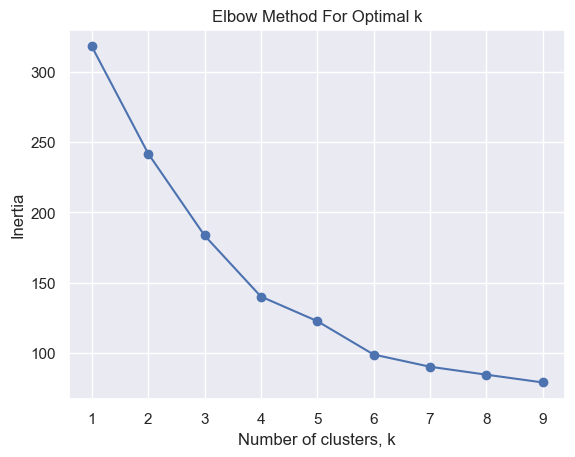

Cluster 1
       Consumer_ID        Age        Income  Purchase_Frequency  \
count    27.000000  27.000000     27.000000           27.000000   
mean     48.555556  51.407407  56528.666667            1.925926   
std      32.830958   9.435038  20863.740551            0.957799   
min       2.000000  33.000000  30854.000000            1.000000   
25%      20.000000  41.500000  37651.000000            1.000000   
50%      51.000000  53.000000  53419.000000            2.000000   
75%      81.000000  60.500000  77110.500000            2.500000   
max     102.000000  64.000000  93734.000000            4.000000   

       Average_Spending  Cluster  
count         27.000000     27.0  
mean         244.592593      0.0  
std          152.638653      0.0  
min           20.000000      0.0  
25%           80.000000      0.0  
50%          331.000000      0.0  
75%          376.500000      0.0  
max          460.000000      0.0  
Cluster 2
       Consumer_ID        Age        Income  Purchase_Frequen

In [32]:

# Assume 'Age', 'Income', and 'Purchase_Frequency' are the relevant characteristics
features = cs_df[['Age', 'Income', 'Purchase_Frequency']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_values, inertia, '-o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow graph, let's say the optimal number is chosen as 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cs_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the segments
for cluster in range(optimal_k):
    print(f"Cluster {cluster+1}")
    print(cs_df[cs_df['Cluster'] == cluster].describe())

# Evaluate the silhouette score
print("Silhouette Score for cluster size", optimal_k, ":", silhouette_score(scaled_features, cs_df['Cluster']))


##  Part3 Target Market Strategy

### 3.1 Market Strategy

*Cluster 1* represents 42 consumers with an average age of approximately 40 years and an average income of around $85,406. They purchase T-shirts around 3.36 times and spend an average of $205.78. This group has a broad range of spending and seems to have a moderate purchase frequency with a relatively higher income.

*Cluster 2* includes 36 consumers who are younger on average (approximately 36 years old) and have a lower average income of about $60,621. However, they have the highest purchase frequency with an average of 7.03 times and the highest average spending of $287.61, indicating that despite their lower income, they prioritize spending on T-shirts.

*Cluster 3* comprises 28 consumers, who are the oldest group on average (47 years old) with the lowest average income of $44,610. They purchase T-shirts less frequently, around 2.46 times on average, and their spending is around $211.00. This group might be more price-sensitive or have a lower demand for T-shirts.

**Basic targeted marketing strategies** Cluster 2's high purchase frequency but lower income suggests they might be looking for more affordable options or deals. Meanwhile, Cluster 1, with a higher income, might be more receptive to premium-priced products. Finally, Cluster 3 could be targeted with promotions that emphasize value due to their lower income and spending.

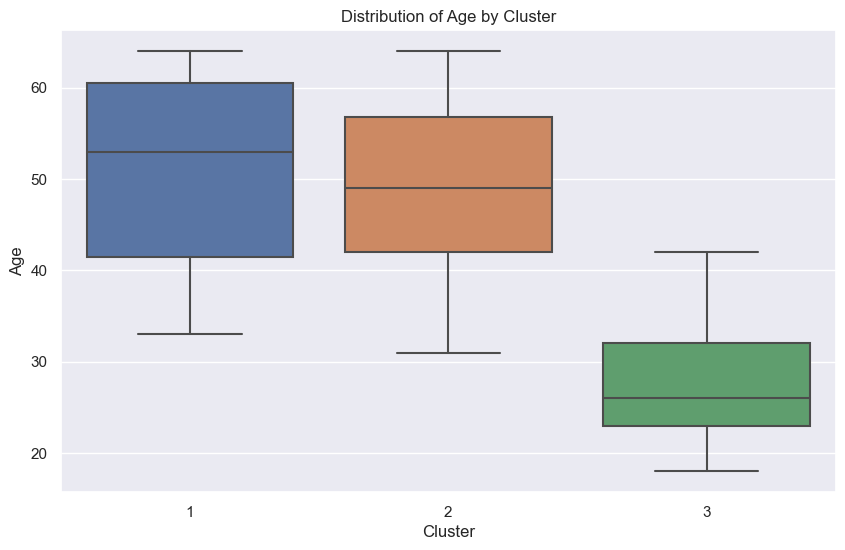

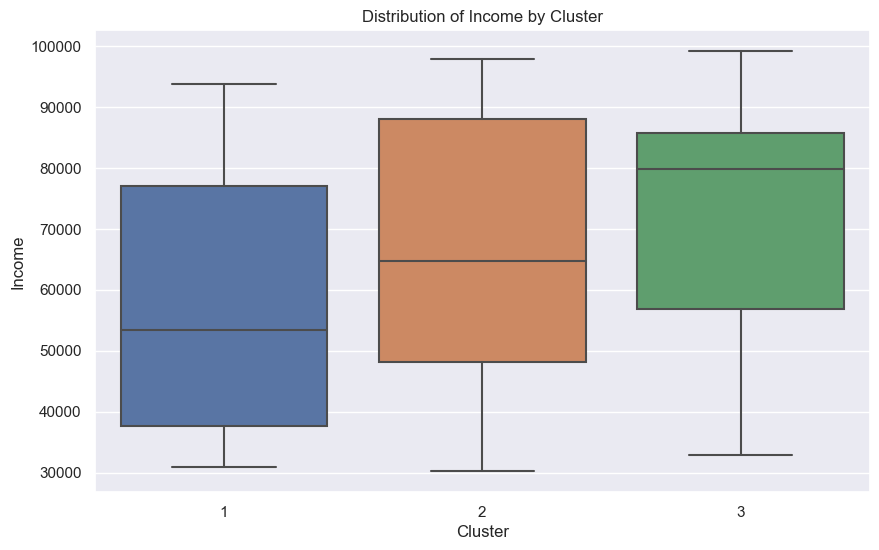

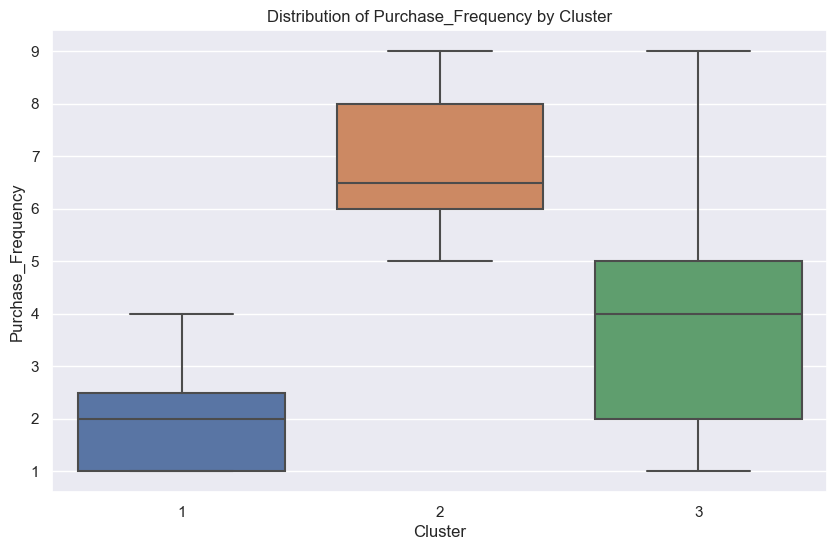

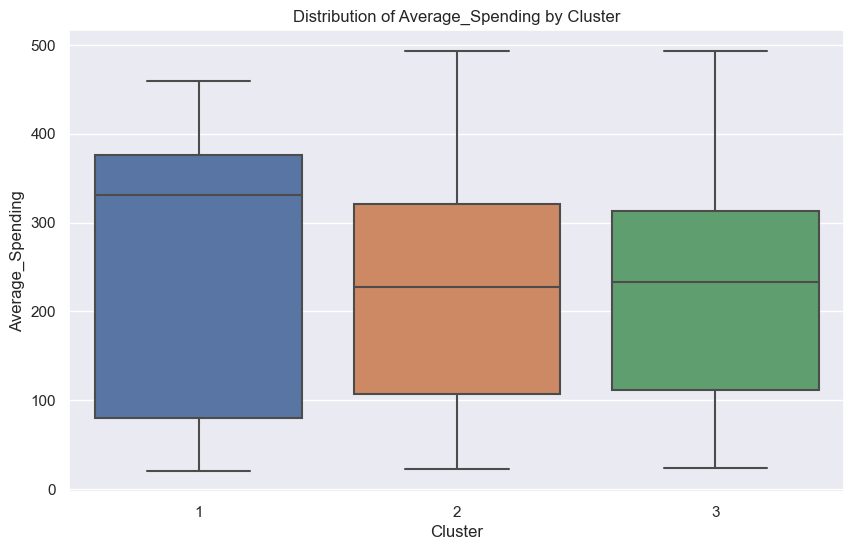

Preferred_Brand   Brand A   Brand B   Brand C  No Preference
Cluster                                                     
1                0.296296  0.259259  0.185185       0.259259
2                0.176471  0.205882  0.352941       0.264706
3                0.222222  0.200000  0.355556       0.222222


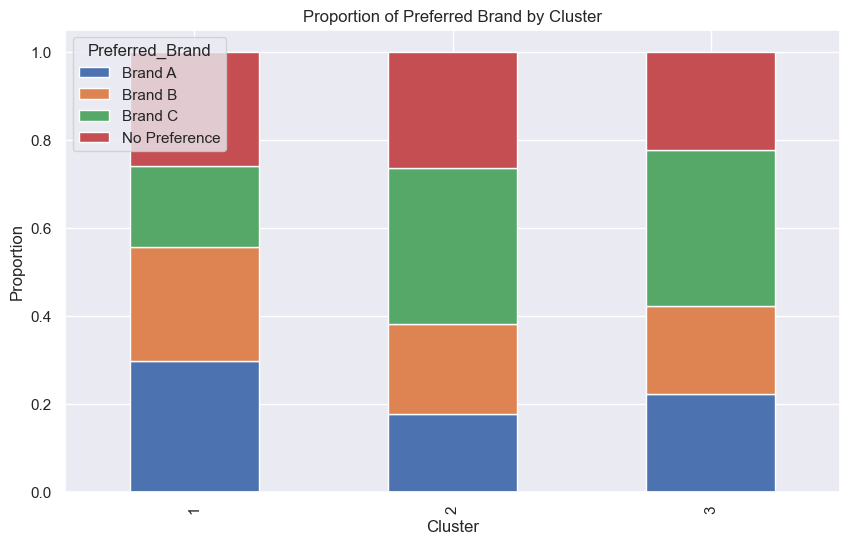

In [33]:
# Visualizing the distribution of key features within each cluster
cs_df['Cluster'] += 1
features_to_visualize = ['Age', 'Income', 'Purchase_Frequency', 'Average_Spending']

for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=cs_df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

# Calculate additional statistics 
# calculate the proportion of each brand within clusters if 'Preferred_Brand' is a feature
if 'Preferred_Brand' in cs_df.columns:
    brand_proportions = cs_df.groupby(['Cluster', 'Preferred_Brand']).size().unstack(fill_value=0)
    brand_proportions = brand_proportions.divide(brand_proportions.sum(axis=1), axis=0)
    print(brand_proportions)

    # Plot the proportions of each brand within clusters
    brand_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Proportion of Preferred Brand by Cluster')
    plt.ylabel('Proportion')
    plt.show()

### 3.2 Regression For The Segments 

As we dive into our regression results, we're faced with a clear-cut demonstration of the predictive strength of our model. The R-squared value stands at a robust 0.797, indicating that approximately 80% of the variance in log-transformed revenue can be explained by our model—a significant achievement, to say the least. The adjusted R-squared, finely tuned for the number of predictors at 0.791, reassures us that our model's explanatory power is not by mere chance.

Our F-statistic, soaring at 133.8 with a practically negligible probability, rejects the null hypothesis with confidence, affirming the collective efficacy of the predictor variables. The log-likelihood and AIC scores set the stage, providing a balance between goodness-of-fit and model simplicity.
Focusing on the coefficients, we see that the elasticity of log-transformed price (LN_PRICE) boasts a coefficient of 0.6919. This is not only substantial but also statistically significant, as its p-value suggests it's not a product of random chance. The log-transformed segment variables (LN_P_SEG_1, LN_P_SEG_2, LN_P_SEG_3) also contribute positively and significantly to the model, with coefficients that reveal their respective impacts on revenue.

In [34]:
# Generate revenue column based on average spending and purchase frequency
cs_df['REVENUE'] = cs_df['Average_Spending'] * cs_df['Purchase_Frequency']

# Create dummy variables for the clusters
cs_df['CLUSTER'] = cs_df['Cluster']  # Assuming there's a column 'Cluster' indicating the cluster number
cluster_dummies = pd.get_dummies(cs_df['CLUSTER'], prefix='seg')
cs_df = pd.concat([cs_df, cluster_dummies], axis=1)

# Create log-transformed columns for price, quantity, and revenue
cs_df['LN_PRICE'] = np.log(cs_df['Average_Spending'])
cs_df['LN_QUANTITY'] = np.log(cs_df['Purchase_Frequency'])  # Assuming quantity is represented by Purchase_Frequency
cs_df['LN_REVENUE'] = np.log(cs_df['REVENUE'])

# Create interactive dummy variables
cs_df['LN_P_SEG_1'] = cs_df['LN_PRICE'] * cs_df['seg_1']
cs_df['LN_P_SEG_2'] = cs_df['LN_PRICE'] * cs_df['seg_2']
cs_df['LN_P_SEG_3'] = cs_df['LN_PRICE'] * cs_df['seg_3']

# Define the independent variables for the regression model
independent_vars = ['LN_PRICE', 'LN_P_SEG_1', 'LN_P_SEG_2', 'LN_P_SEG_3']
independentx = cs_df[independent_vars]
independent = sm.add_constant(independentx, prepend=False)

# Dependent variable
dependent = cs_df['LN_REVENUE']

# Run the regression
mod = sm.OLS(dependent, independent)
results = mod.fit()

# Display the regression summary
print(results.summary())

# Extract and transform the coefficients to represent elasticity
coefficients = results.params
coefficients['REV_ELASTICITY_BASE'] = coefficients['LN_PRICE']

# Create a DataFrame to display the elasticities
elasticities = pd.DataFrame({
    'CLUSTER': ['Base', '1', '2', '3'],
    'REV_ELASTICITY': [
        coefficients['REV_ELASTICITY_BASE'],
        coefficients['REV_ELASTICITY_BASE'] + coefficients['LN_P_SEG_1'],
        coefficients['REV_ELASTICITY_BASE'] + coefficients['LN_P_SEG_2'],
        coefficients['REV_ELASTICITY_BASE'] + coefficients['LN_P_SEG_3']
    ]
})

# Show the revenue elasticities for each cluster
print(elasticities)


                            OLS Regression Results                            
Dep. Variable:             LN_REVENUE   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           4.92e-35
Time:                        23:49:37   Log-Likelihood:                -83.766
No. Observations:                 106   AIC:                             175.5
Df Residuals:                     102   BIC:                             186.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LN_PRICE       0.7923      0.045     17.618      0.0

Now, let's take a moment to analyze the data for each cluster in context with these findings. The base cluster, with a revenue elasticity of approximately 0.692, underscores its sensitivity to price changes—echoing the insights we've gleaned from the regression.
Cluster 1 presents an even higher elasticity at 0.881, suggesting a more pronounced response to price adjustments. Cluster 2 tops the chart with an elasticity over 1, at 1.059, indicating a potential for considerable revenue impact through strategic pricing.
Cluster 3, with an elasticity of 0.827, also shows a significant response to price changes, although it's less pronounced compared to Cluster 2.
It's striking to see that all clusters exhibit a revenue elasticity higher than the coefficient of LN_PRICE, leading us to ponder over the idiosyncrasies within each segment's consumer behavior and market dynamics.
Now, here's the thing that really grabs our attention. Despite the inherent variances and the so-called "noise" within real-world data—as our regression notes suggest—there's a strong signal here. This signal points to the fact that each cluster's pricing strategy can't be painted with a broad brush; rather, it needs to be carefully calibrated to their unique elasticity.
Reflecting on the philosophical musings about data science and its applications, we come back down to the actionable insights. Our model, while not flawless, provides a clear direction for strategic pricing moves.
For Cluster 1, riding on a higher than average elasticity, a bolder price adjustment may be warranted, possibly above the inflation rate, carefully gauging consumer response.
Cluster 2, with its elasticity tipping over 1, may be a candidate for an even more nuanced approach, balancing price increments with the potential for significant volume responses.
Cluster 3's elasticity suggests a more moderate approach to price changes, aligning closely with inflation rates to maintain a steady revenue stream without risking volume loss.
